# What is PyTorch?
It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed

# <center>Lesson1 Getting Started
## Tensors
Tensors are similar to **NumPy’s ndarrays**, with the addition being that Tensors can also be used on a **GPU to accelerate computing**.

In [1]:
import torch

In [2]:
# Construct a 5x3 matrix, uninitialized
x = torch.Tensor(5, 3)
print(x)


 5.8932e+01  8.2116e-43  1.3643e+05
 8.2116e-43  1.4299e+05  8.2116e-43
 3.7703e+21  0.0000e+00  3.7703e+21
 0.0000e+00  1.6020e-19  4.4721e+21
 6.2625e+22  4.7428e+30  1.4587e-19
[torch.FloatTensor of size 5x3]



In [3]:
# Construct a randomly initialized matrix
x = torch.rand(5, 3)
print(x)


 0.5229  0.2698  0.0579
 0.1783  0.4091  0.4889
 0.6208  0.9063  0.9489
 0.6376  0.6356  0.5804
 0.3217  0.1040  0.1526
[torch.FloatTensor of size 5x3]



In [4]:
# Get its size
print(x.size())

torch.Size([5, 3])


## Operations
There are multiple syntaxes for operations. In the following example, we will take a look at the **addition operation**.

In [5]:
# Addition

# syntax 1
y = torch.rand(5, 3)
print('syntax 1', x + y)

# syntax 2
print('syntax 2', torch.add(x, y))

syntax 1 
 1.3656  1.2410  0.5447
 0.5575  0.9199  1.0482
 1.0776  1.5580  1.7267
 0.9032  1.1052  1.0005
 0.9765  0.1115  0.4987
[torch.FloatTensor of size 5x3]

syntax 2 
 1.3656  1.2410  0.5447
 0.5575  0.9199  1.0482
 1.0776  1.5580  1.7267
 0.9032  1.1052  1.0005
 0.9765  0.1115  0.4987
[torch.FloatTensor of size 5x3]



In [6]:
# sytax 3 - providing an output tensor as argument
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print('syntax 3', result)

# sytax 4 - (in-place) adds x to y
y.add_(x)
print('syntax 4', y)

syntax 3 
 1.3656  1.2410  0.5447
 0.5575  0.9199  1.0482
 1.0776  1.5580  1.7267
 0.9032  1.1052  1.0005
 0.9765  0.1115  0.4987
[torch.FloatTensor of size 5x3]

syntax 4 
 1.3656  1.2410  0.5447
 0.5575  0.9199  1.0482
 1.0776  1.5580  1.7267
 0.9032  1.1052  1.0005
 0.9765  0.1115  0.4987
[torch.FloatTensor of size 5x3]



## Standard NumPy-like indexing

In [7]:
print(x[:, 1])


 0.2698
 0.4091
 0.9063
 0.6356
 0.1040
[torch.FloatTensor of size 5]



### More details
100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc., are described [here](http://pytorch.org/docs/stable/torch.html).

## NumPy Bridge
Converting a **Torch Tensor to a NumPy array** and vice versa is a breeze.

The Torch Tensor and NumPy array will **share their underlying memory locations**, and changing one will change the other.

## 1. Converting a Torch Tensor to a NumPy Array

In [8]:
a = torch.ones(5)
print('a: ', a)

b = a.numpy()
print('b: ', b)

print('\n\nAfter changing the value in a(tensor): ')
a.add_(1)
print('a: ',a)
print('b: ',b)

a:  
 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

b:  [1. 1. 1. 1. 1.]


After changing the value in a(tensor): 
a:  
 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

b:  [2. 2. 2. 2. 2.]


## 2. Converting NumPy Array to Torch Tensor

In [9]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



## CUDA Tensors

Tensors can be moved onto GPU using the **.cuda** method.

In [10]:
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

# <center>Lesson2 Autograd: automatic differentiation
The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.
## Variable <img src='Variable.png'>
You can access the raw tensor through the **.data** attribute, while the gradient w.r.t. this variable is accumulated into **.grad**.

Each variable has a **.grad_fn** attribute that references a Function that has **created the Variable** (except for Variables created by the user - their grad_fn is None).

In [11]:
from torch.autograd import Variable

In [12]:
# Create a variable
x = Variable(torch.ones(2, 2), requires_grad=True)
print('x: ', x)

y = x + 2
print('y: ', y)

x:  Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

y:  Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [13]:
print('x\'s grad_fn: ', x.grad_fn)
print('y\'s grad_fn: ', y.grad_fn)

x's grad_fn:  None
y's grad_fn:  <AddBackward0 object at 0x0000024A4E8F4E10>


In [14]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



## Gradients
let's backprop to calculate the gradients

In [15]:
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



# <center>Lesson3 Training an image classifier
For example, look at this network that classifies digit images:
<img src='mnist.png'>
A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: **weight = weight - learning_rate * gradient**
## Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

## 1. Loading and normalizing CIFAR10
For this tutorial, we will use the **CIFAR10 dataset**. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.<img src='cifar10.png'>

In [16]:
# Using torchvision, it’s extremely easy to load CIFAR10.
import torchvision
import torchvision.transforms as transforms

# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


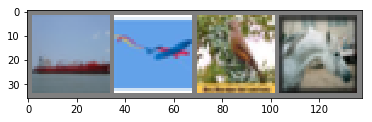

GroundTruth
 ship plane  bird horse


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('GroundTruth')
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. Define a Convolution Neural Network

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


## 3. Define a Loss function and optimizer

In [24]:
import torch.optim as optim

# classification Cross-Entropy loss
loss_function = nn.CrossEntropyLoss()

# stochastic gradient descent
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 4. Train the network

In [25]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.168
[1,  4000] loss: 1.841
[1,  6000] loss: 1.661
[1,  8000] loss: 1.582
[1, 10000] loss: 1.518
[1, 12000] loss: 1.475
[2,  2000] loss: 1.392
[2,  4000] loss: 1.393
[2,  6000] loss: 1.339
[2,  8000] loss: 1.328
[2, 10000] loss: 1.280
[2, 12000] loss: 1.279
Finished Training


## 5. Test the network on the test data

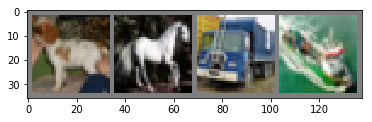

GroundTruth:    dog horse truck  ship
Predicted:    dog horse truck  frog


In [33]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# forward
outputs = net(Variable(images))

# get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Let us look at how the network performs on the whole dataset.

In [27]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


what are the classes that performed well, and the classes that did not perform well:

In [28]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 63 %
Accuracy of  bird : 46 %
Accuracy of   cat : 37 %
Accuracy of  deer : 28 %
Accuracy of   dog : 41 %
Accuracy of  frog : 80 %
Accuracy of horse : 67 %
Accuracy of  ship : 76 %
Accuracy of truck : 62 %
